Mulai proses optimasi...
Anggaran Maksimal: Rp 50,000,000
Risiko Kegagalan Maksimal: 5.00%

Rumus Total Biaya Tahunan:
Total Biaya = (12 / X1) * C_Inspeksi + (12 / X2) * C_Penggantian(X3) + (1 / sqrt(X1)) * Faktor_Kualitas(X3) * 0.2 * C_Kegagalan


--- Hasil Lengkap Semua Kombinasi ---
    X1 (Bulan)  X2 (Bulan) X3 (Kualitas) Total Biaya (Rp) Probabilitas Gagal  Layak
0            1          24       Standar    Rp 90,000,000             0.2000  Tidak
1            1          24       Premium    Rp 88,500,000             0.1600  Tidak
2            1          24           OEM    Rp 89,500,000             0.1200  Tidak
3            1          36       Standar    Rp 86,666,667             0.2000  Tidak
4            1          36       Premium    Rp 84,333,333             0.1600  Tidak
5            1          36           OEM    Rp 83,666,667             0.1200  Tidak
6            1          48       Standar    Rp 85,000,000             0.2000  Tidak
7            1          48       Premium 

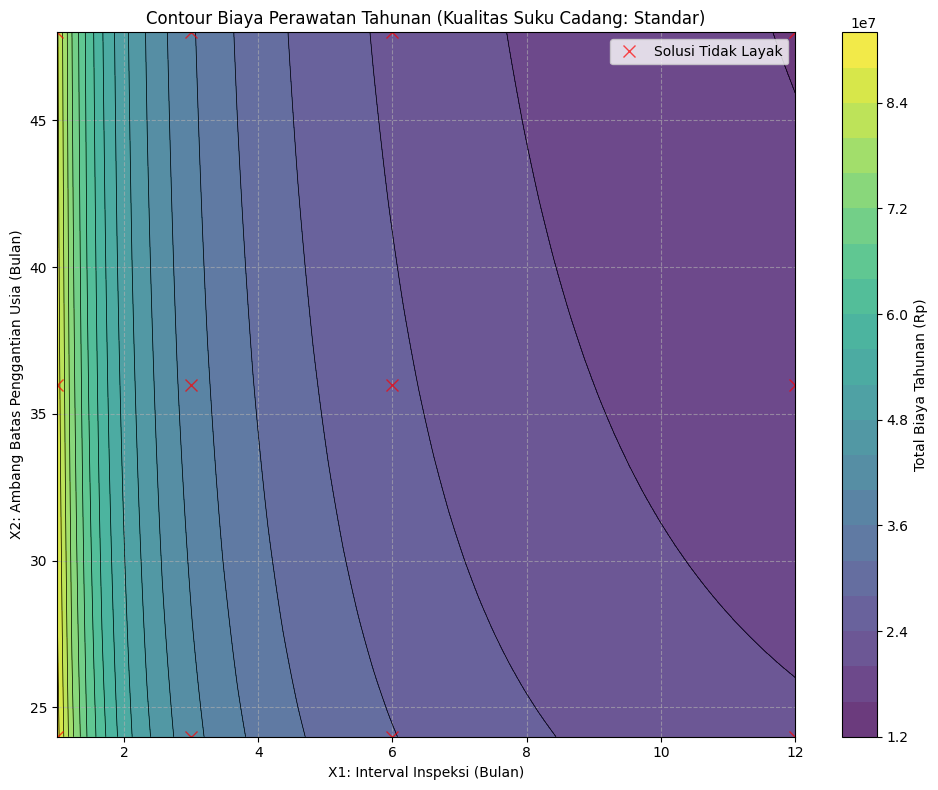

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19512\3377839117.py:184: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1_mesh, X2_mesh, Z_prob_fail, levels=[MAX_RISIKO_KEGAGALAN], colors='blue', linestyles='dashed', linewidths=2, label=f'Batas Risiko Kegagalan ({MAX_RISIKO_KEGAGALAN:.2%})')


ValueError: incomplete format

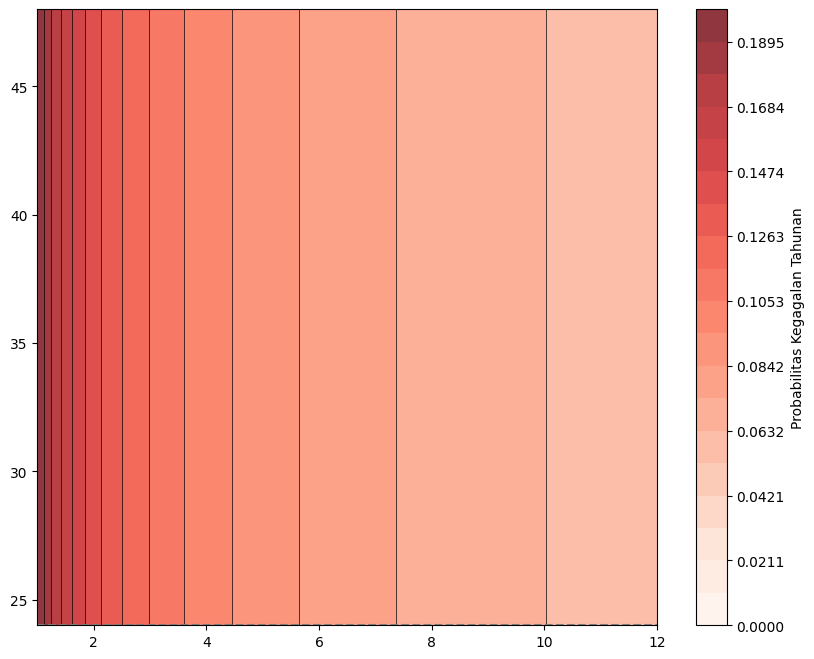

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Untuk tampilan tabel

# --- 1. Definisikan Variabel dan Nilai yang Mungkin ---
X1_options = [1, 3, 6, 12] # Interval Inspeksi (bulan)
X2_options = [24, 36, 48] # Ambang Batas Penggantian Berdasarkan Usia (bulan)
X3_options = ["Standar", "Premium", "OEM"] # Kualitas Suku Cadang Pengganti

# --- 2. Definisikan Parameter Biaya ---
C_Inspeksi = 5_000_000 # Rp 5.000.000
C_Kegagalan = 100_000_000 # Rp 100.000.000 (biaya rata-rata satu kali kegagalan tak terduga)

# Biaya Penggantian (bergantung pada X3)
C_Penggantian_map = {
    "Standar": 20_000_000,
    "Premium": 25_000_000,
    "OEM": 35_000_000,
}

# Faktor Penurunan Probabilitas Kegagalan (bergantung pada X3)
Faktor_Kualitas_map = {
    "Standar": 1.0,
    "Premium": 0.8, # 20% pengurangan probabilitas gagal
    "OEM": 0.6,    # 40% pengurangan probabilitas gagal
}

# --- 3. Fungsi Objektif: Total Biaya Tahunan ---
def calculate_cost(x1, x2, x3_kualitas):
    """
    Menghitung total biaya tahunan berdasarkan variabel.
    x1: Interval Inspeksi (bulan)
    x2: Ambang Batas Penggantian Berdasarkan Usia (bulan)
    x3_kualitas: Kualitas Suku Cadang ("Standar", "Premium", "OEM")
    """
    
    # Biaya Inspeksi Reguler
    biaya_inspeksi = (12 / x1) * C_Inspeksi

    # Biaya Penggantian Proaktif (bergantung pada X3)
    biaya_penggantian = (12 / x2) * C_Penggantian_map[x3_kualitas]

    # Probabilitas Tahunan Kegagalan Tak Terduga (bergantung pada X1 dan X3)
    # Menghindari pembagian dengan nol atau sqrt dari nol
    if x1 <= 0: return float('inf') # Invalid x1
    prob_gagal = (1 / np.sqrt(x1)) * Faktor_Kualitas_map[x3_kualitas] * 0.2
    
    # Biaya Perbaikan Kegagalan Tak Terduga
    biaya_kegagalan = prob_gagal * C_Kegagalan
    
    total_biaya = biaya_inspeksi + biaya_penggantian + biaya_kegagalan
    return total_biaya, prob_gagal

# --- 4. Kendala (Constraints) ---
MAX_ANGGARAN_TAHUNAN = 50_000_000 # Rp 50.000.000 per lokomotif per tahun
MAX_RISIKO_KEGAGALAN = 0.05 # Tidak lebih dari 5% kemungkinan gagal per tahun

def check_constraints(total_biaya, prob_gagal):
    """
    Memeriksa apakah solusi memenuhi semua kendala.
    """
    anggaran_ok = total_biaya <= MAX_ANGGARAN_TAHUNAN
    risiko_ok = prob_gagal <= MAX_RISIKO_KEGAGALAN
    return anggaran_ok and risiko_ok

# --- 5. Implementasi Optimasi (Brute-force/Exhaustive Search) ---
best_solution = None
min_total_cost = float('inf')
feasible_points = [] # Simpan solusi layak untuk plotting

print("Mulai proses optimasi...")
print(f"Anggaran Maksimal: Rp {MAX_ANGGARAN_TAHUNAN:,.0f}")
print(f"Risiko Kegagalan Maksimal: {MAX_RISIKO_KEGAGALAN:.2%}\n")

# print rumus object function
print("Rumus Total Biaya Tahunan:")
print("Total Biaya = (12 / X1) * C_Inspeksi + (12 / X2) * C_Penggantian(X3) + (1 / sqrt(X1)) * Faktor_Kualitas(X3) * 0.2 * C_Kegagalan\n")

results = [] # Untuk menyimpan semua hasil untuk tabel

for x1 in X1_options:
    for x2 in X2_options:
        for x3_kualitas in X3_options:
            total_biaya, prob_gagal = calculate_cost(x1, x2, x3_kualitas)
            
            is_feasible = check_constraints(total_biaya, prob_gagal)
            
            results.append({
                'X1 (Bulan)': x1,
                'X2 (Bulan)': x2,
                'X3 (Kualitas)': x3_kualitas,
                'Total Biaya (Rp)': total_biaya,
                'Probabilitas Gagal': prob_gagal,
                'Layak': 'Ya' if is_feasible else 'Tidak'
            })

            if is_feasible:
                feasible_points.append({'x1': x1, 'x2': x2, 'x3': x3_kualitas, 'cost': total_biaya, 'prob_fail': prob_gagal})
                if total_biaya < min_total_cost:
                    min_total_cost = total_biaya
                    best_solution = {'x1': x1, 'x2': x2, 'x3': x3_kualitas, 'cost': total_biaya, 'prob_fail': prob_gagal}

print("\n--- Hasil Lengkap Semua Kombinasi ---")
df_results = pd.DataFrame(results)
# Formatting for better readability
df_results['Total Biaya (Rp)'] = df_results['Total Biaya (Rp)'].apply(lambda x: f"Rp {x:,.0f}")
df_results['Probabilitas Gagal'] = df_results['Probabilitas Gagal'].apply(lambda x: f"{x:.4f}")
print(df_results.to_string())

print("\n--- Ringkasan Optimasi ---")
if best_solution:
    print(f"Solusi Optimal Ditemukan:")
    print(f"  Interval Inspeksi (X1): {best_solution['x1']} bulan")
    print(f"  Ambang Batas Penggantian (X2): {best_solution['x2']} bulan")
    print(f"  Kualitas Suku Cadang (X3): {best_solution['x3']}")
    print(f"  Total Biaya Optimal: Rp {best_solution['cost']:,.0f}")
    print(f"  Probabilitas Kegagalan: {best_solution['prob_fail']:.4f}")
else:
    print("Tidak ada solusi yang memenuhi semua kendala.")

# --- 6. Plotting Contour ---

# Pilih Kualitas Suku Cadang untuk plot contour (misalnya, "Standar")
# Anda bisa mengganti ini untuk melihat plot untuk kualitas lain
plot_x3_kualitas = "Standar" 

# Buat grid untuk X1 dan X2
x1_grid = np.linspace(min(X1_options), max(X1_options), 50)
x2_grid = np.linspace(min(X2_options), max(X2_options), 50)
X1_mesh, X2_mesh = np.meshgrid(x1_grid, x2_grid)

# Hitung Total Biaya untuk setiap titik di grid (dengan X3 tetap)
Z_cost = np.zeros_like(X1_mesh)
Z_prob_fail = np.zeros_like(X1_mesh)

for i in range(X1_mesh.shape[0]):
    for j in range(X1_mesh.shape[1]):
        cost, prob_fail = calculate_cost(X1_mesh[i, j], X2_mesh[i, j], plot_x3_kualitas)
        Z_cost[i, j] = cost
        Z_prob_fail[i, j] = prob_fail

# --- Plot Contour Biaya ---
plt.figure(figsize=(10, 8))
contour = plt.contourf(X1_mesh, X2_mesh, Z_cost, levels=20, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Total Biaya Tahunan (Rp)')
plt.contour(X1_mesh, X2_mesh, Z_cost, levels=contour.levels, colors='black', linewidths=0.5)

# Plot Kendala Anggaran (jika total biaya > MAX_ANGGARAN_TAHUNAN, beri tanda X)
# Ini lebih visual daripada garis langsung karena fungsi kita kompleks
# Kita akan menandai titik-titik yang tidak layak berdasarkan kendala
for point in results:
    if point['X3 (Kualitas)'] == plot_x3_kualitas:
        if point['Layak'] == 'Ya':
            plt.plot(point['X1 (Bulan)'], point['X2 (Bulan)'], 'go', markersize=8, label='Solusi Layak' if 'Solusi Layak' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)
        else:
            plt.plot(point['X1 (Bulan)'], point['X2 (Bulan)'], 'rx', markersize=8, label='Solusi Tidak Layak' if 'Solusi Tidak Layak' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)

# Tandai solusi optimal
if best_solution and best_solution['x3'] == plot_x3_kualitas:
    plt.plot(best_solution['x1'], best_solution['x2'], 'P', markersize=12, color='cyan', label='Solusi Optimal', edgecolor='black')

plt.title(f'Contour Biaya Perawatan Tahunan (Kualitas Suku Cadang: {plot_x3_kualitas})')
plt.xlabel('X1: Interval Inspeksi (Bulan)')
plt.ylabel('X2: Ambang Batas Penggantian Usia (Bulan)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot Contour Probabilitas Kegagalan ---
plt.figure(figsize=(10, 8))
contour_prob = plt.contourf(X1_mesh, X2_mesh, Z_prob_fail, levels=np.linspace(0, 0.2, 20), cmap='Reds', alpha=0.8) # Sesuaikan level
plt.colorbar(contour_prob, label='Probabilitas Kegagalan Tahunan')
plt.contour(X1_mesh, X2_mesh, Z_prob_fail, levels=contour_prob.levels, colors='black', linewidths=0.5)

# Tambahkan garis batas risiko kegagalan
plt.axhline(y=min(X2_options), color='gray', linestyle='--', label='Batas X2 Min') # Dummy line for reference
plt.axvline(x=min(X1_options), color='gray', linestyle='--', label='Batas X1 Min') # Dummy line for reference

# Plot kendala probabilitas kegagalan (garis batas)
# Ini adalah garis di mana P_Gagal = MAX_RISIKO_KEGAGALAN. Kita perlu mencari X1 dan X2 yang memenuhi ini.
# Untuk plot, kita bisa menandai area yang tidak layak secara visual
# Area di mana Z_prob_fail > MAX_RISIKO_KEGAGALAN (misalnya)
plt.contour(X1_mesh, X2_mesh, Z_prob_fail, levels=[MAX_RISIKO_KEGAGALAN], colors='blue', linestyles='dashed', linewidths=2, label=f'Batas Risiko Kegagalan ({MAX_RISIKO_KEGAGALAN:.2%})')
plt.clabel(plt.contour(X1_mesh, X2_mesh, Z_prob_fail, levels=[MAX_RISIKO_KEGAGALAN], colors='blue', linestyles='dashed', linewidths=2), inline=True, fontsize=10, fmt=f'P_Gagal = {MAX_RISIKO_KEGAGALAN:.2%}')


# Tandai titik-titik yang layak/tidak layak (sama seperti plot biaya)
for point in results:
    if point['X3 (Kualitas)'] == plot_x3_kualitas:
        if point['Layak'] == 'Ya':
            plt.plot(point['X1 (Bulan)'], point['X2 (Bulan)'], 'go', markersize=8, label='Solusi Layak' if 'Solusi Layak_prob' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)
        else:
            plt.plot(point['X1 (Bulan)'], point['X2 (Bulan)'], 'rx', markersize=8, label='Solusi Tidak Layak' if 'Solusi Tidak Layak_prob' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)

if best_solution and best_solution['x3'] == plot_x3_kualitas:
    plt.plot(best_solution['x1'], best_solution['x2'], 'P', markersize=12, color='cyan', label='Solusi Optimal', edgecolor='black')

plt.title(f'Contour Probabilitas Kegagalan Tahunan (Kualitas Suku Cadang: {plot_x3_kualitas})')
plt.xlabel('X1: Interval Inspeksi (Bulan)')
plt.ylabel('X2: Ambang Batas Penggantian Usia (Bulan)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()